# Exploring Influenza Surveillance Data

Introduction:

Influenza, a contagious respiratory illness, poses significant public health challenges worldwide. Surveillance of influenza-like illness (ILI) and respiratory virus activity is crucial for understanding epidemiological trends, guiding public health interventions, and informing vaccination strategies. In this exploratory data analysis (EDA), we delve into comprehensive influenza surveillance data from California, aiming to uncover insights into disease trends, correlations between variables, and regional variations in ILI rates.

Through this analysis, we seek to:

Explore temporal trends in influenza activity over multiple seasons.
Investigate correlations between key variables such as ILI rates, positive cases, and testing volumes.
Examine regional variations in ILI rates and the prevalence of different influenza strains.
Provide insights that can inform public health decision-making and guide targeted interventions to mitigate the impact of influenza outbreaks.
By leveraging data-driven insights, we aim to contribute to the understanding of influenza epidemiology and support efforts to enhance surveillance and response strategies for influenza and other respiratory viruses.

## **1. Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Source:
https://catalog.data.gov/dataset/influenza-surveillance-55e4d

## **2. Reading and understanding datasets**

In [2]:
df1=pd.read_csv('flu-clinicallab-byregion-fluseason.csv')
df2=pd.read_csv('flu-ili-byregion-fluseason.csv')
df3=pd.read_csv('flu-publichealthlab-byregion-fluseason.csv')

In [3]:
df1.head()

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive
0,2009-2010,200940,10/10/09,Bay Area,Influenza_A,36,220,16.36
1,2009-2010,200940,10/10/09,Bay Area,Influenza_B,0,220,0.00
2,2009-2010,200940,10/10/09,Bay Area,Total_Influenza,36,220,16.36
3,2009-2010,200940,10/10/09,Bay Area,RSV,0,190,0.00
4,2009-2010,200940,10/10/09,California,Influenza_A,1077,3324,32.40


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50011 entries, 0 to 50010
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             50011 non-null  object 
 1   date_code          50011 non-null  int64  
 2   weekending         50011 non-null  object 
 3   region             50011 non-null  object 
 4   Respiratory_Virus  50011 non-null  object 
 5   Number_Positive    50011 non-null  int64  
 6   Specimens_Tested   50011 non-null  int64  
 7   Percent_Positive   42414 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 3.1+ MB


In [5]:
df1.describe()

,date_code,Number_Positive,Specimens_Tested,Percent_Positive
count,50011.000000,50011.000000,50011.000000,42414.000000
mean,201658.047570,20.653936,351.877027,3.943707
std,263.947403,91.746507,611.778964,7.121999
min,200940.000000,0.000000,0.000000,0.000000
25%,201507.000000,0.000000,40.000000,0.000000
50%,201707.000000,1.000000,133.000000,0.710000
75%,201849.000000,7.000000,402.000000,4.550000
max,202039.000000,3120.000000,8013.000000,100.000000


In [6]:
df2.head()

,season,date_code,weekending,region,Total_ILI,Total_Patients_Seen,Percent_ILI,Number_Providers_Reporting
0,2001-2002,200140,10/6/2001,Bay Area,3,135,2.22,2
1,2001-2002,200140,10/6/2001,California,25,1211,2.06,14
2,2001-2002,200140,10/6/2001,Central,0,0,NaN,0
3,2001-2002,200140,10/6/2001,Lower Southern,2,336,0.60,4
4,2001-2002,200140,10/6/2001,Northern,20,529,3.78,4


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season                      5946 non-null   object 
 1   date_code                   5946 non-null   int64  
 2   weekending                  5946 non-null   object 
 3   region                      5946 non-null   object 
 4   Total_ILI                   5946 non-null   int64  
 5   Total_Patients_Seen         5946 non-null   int64  
 6   Percent_ILI                 5917 non-null   float64
 7   Number_Providers_Reporting  5946 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 371.8+ KB


In [8]:
df3.head()

,season,date_code,weekending,region,Influenza_Category,Count
0,2009-2010,200940,10/04/09,Bay Area,Influenza_A,56
1,2009-2010,200940,10/04/09,Bay Area,Influenza_AH3,0
2,2009-2010,200940,10/04/09,Bay Area,Influenza_AH1,0
3,2009-2010,200940,10/04/09,Bay Area,Influenza_AH1pdm09,0
4,2009-2010,200940,10/04/09,Bay Area,Influenza_ANotSubtyped,56


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   season              30072 non-null  object
 1   date_code           30072 non-null  int64 
 2   weekending          30072 non-null  object
 3   region              30072 non-null  object
 4   Influenza_Category  30072 non-null  object
 5   Count               30072 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [10]:
df3.describe()

,date_code,Count
count,30072.000000,30072.000000
mean,201543.978053,17.774674
std,315.442404,72.169178
min,200940.000000,0.000000
25%,201303.000000,0.000000
50%,201550.000000,0.000000
75%,201819.000000,6.000000
max,202040.000000,1980.000000


The dataset contains multiple variables capturing key aspects of influenza surveillance, including:

Temporal Information:
Season: The influenza season during which the data was collected.
Weekending: The end date of the surveillance week.
Date Code: Numeric representation of the date.
Geographical Information:
Region: The geographical region within California where surveillance data was collected.
Influenza and Respiratory Virus Data:
Respiratory Virus: The type of respiratory virus detected (e.g., Influenza A, Influenza B, other respiratory viruses).
Influenza Category: The category of influenza virus (e.g., Influenza A(H1N1), Influenza A(H3N2), Influenza B).
Surveillance Metrics:
Number_Positive: The number of positive cases detected for a particular virus.
Specimens_Tested: The total number of specimens tested for respiratory viruses.
Percent_Positive: The percentage of specimens that tested positive for a particular virus.
Total_ILI: Total cases of influenza-like illness reported.
Total_Patients_Seen: Total number of patients seen at outpatient clinics.
Percent_ILI: The percentage of patients with ILI among all patients seen at outpatient clinics.
Number_Providers_Reporting: The number of healthcare providers reporting ILI data.

## **3. Data Cleaning**

In [11]:
df1.isnull().sum()

season                  0
date_code               0
weekending              0
region                  0
Respiratory_Virus       0
Number_Positive         0
Specimens_Tested        0
Percent_Positive     7597
dtype: int64

In [12]:
df2.isnull().sum()

season                         0
date_code                      0
weekending                     0
region                         0
Total_ILI                      0
Total_Patients_Seen            0
Percent_ILI                   29
Number_Providers_Reporting     0
dtype: int64

In [13]:
df3.isnull().sum()

season                0
date_code             0
weekending            0
region                0
Influenza_Category    0
Count                 0
dtype: int64

There are null values in the first and second dataframe.

In [14]:
median_percent_positive = df1['Percent_Positive'].median()
df1['Percent_Positive'].fillna(median_percent_positive, inplace=True)

df1['weekending'] = pd.to_datetime(df1['weekending'])

C:\Users\darre\AppData\Local\Temp\ipykernel_39176\3039449600.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['weekending'] = pd.to_datetime(df1['weekending'])


In [15]:
df1.isnull().sum()

season               0
date_code            0
weekending           0
region               0
Respiratory_Virus    0
Number_Positive      0
Specimens_Tested     0
Percent_Positive     0
dtype: int64

In [16]:
median_percent_ili = df2['Percent_ILI'].median()
df2['Percent_ILI'].fillna(median_percent_ili, inplace=True)

# Convert 'weekending' column to datetime format
df2['weekending'] = pd.to_datetime(df2['weekending'])

In [17]:
df2.isnull().sum()

season                        0
date_code                     0
weekending                    0
region                        0
Total_ILI                     0
Total_Patients_Seen           0
Percent_ILI                   0
Number_Providers_Reporting    0
dtype: int64

## 4. **Merging Data**

In [18]:
# Merge df1 and df2 on common identifiers
merged_df = pd.merge(df1, df2, on=['season', 'weekending', 'region'])

# Check the merged dataframe
print("Merged DataFrame:\n", merged_df.head())

# Now, you have a merged DataFrame containing data from both datasets.


Merged DataFrame:
       season  date_code_x weekending      region Respiratory_Virus  \
0  2009-2010       200940 2009-10-10    Bay Area       Influenza_A   
1  2009-2010       200940 2009-10-10    Bay Area       Influenza_B   
2  2009-2010       200940 2009-10-10    Bay Area   Total_Influenza   
3  2009-2010       200940 2009-10-10    Bay Area               RSV   
4  2009-2010       200940 2009-10-10  California       Influenza_A   

   Number_Positive  Specimens_Tested  Percent_Positive  date_code_y  \
0               36               220             16.36       200940   
1                0               220              0.00       200940   
2               36               220             16.36       200940   
3                0               190              0.00       200940   
4             1077              3324             32.40       200940   

   Total_ILI  Total_Patients_Seen  Percent_ILI  Number_Providers_Reporting  
0        282                 7174         3.93          

In [19]:
# Merge df1 and df2 on common identifiers
merged_df = pd.merge(df1, df2, on=['season', 'weekending', 'region'])

# Check the merged dataframe
print("Merged DataFrame:\n", merged_df.head())

# Now, you have a merged DataFrame containing data from both datasets.


Merged DataFrame:
       season  date_code_x weekending      region Respiratory_Virus  \
0  2009-2010       200940 2009-10-10    Bay Area       Influenza_A   
1  2009-2010       200940 2009-10-10    Bay Area       Influenza_B   
2  2009-2010       200940 2009-10-10    Bay Area   Total_Influenza   
3  2009-2010       200940 2009-10-10    Bay Area               RSV   
4  2009-2010       200940 2009-10-10  California       Influenza_A   

   Number_Positive  Specimens_Tested  Percent_Positive  date_code_y  \
0               36               220             16.36       200940   
1                0               220              0.00       200940   
2               36               220             16.36       200940   
3                0               190              0.00       200940   
4             1077              3324             32.40       200940   

   Total_ILI  Total_Patients_Seen  Percent_ILI  Number_Providers_Reporting  
0        282                 7174         3.93          

In [20]:
# Convert 'weekending' column in df3 to datetime format
df3['weekending'] = pd.to_datetime(df3['weekending'])

# Merge df3 with the already merged DataFrame (merged_df) on common identifiers
comprehensive_df = pd.merge(merged_df, df3, on=['season', 'region'])

# Check the comprehensive merged dataframe
print("Comprehensive Merged DataFrame:\n", comprehensive_df.head())


C:\Users\darre\AppData\Local\Temp\ipykernel_39176\1687963804.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['weekending'] = pd.to_datetime(df3['weekending'])


Comprehensive Merged DataFrame:
       season  date_code_x weekending_x    region Respiratory_Virus  \
0  2009-2010       200940   2009-10-10  Bay Area       Influenza_A   
1  2009-2010       200940   2009-10-10  Bay Area       Influenza_A   
2  2009-2010       200940   2009-10-10  Bay Area       Influenza_A   
3  2009-2010       200940   2009-10-10  Bay Area       Influenza_A   
4  2009-2010       200940   2009-10-10  Bay Area       Influenza_A   

   Number_Positive  Specimens_Tested  Percent_Positive  date_code_y  \
0               36               220             16.36       200940   
1               36               220             16.36       200940   
2               36               220             16.36       200940   
3               36               220             16.36       200940   
4               36               220             16.36       200940   

   Total_ILI  Total_Patients_Seen  Percent_ILI  Number_Providers_Reporting  \
0        282                 7174        

## **5. EDA**

In [21]:
# Calculate summary statistics
summary_stats = merged_df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
          date_code_x                     weekending  Number_Positive  \
count   42822.000000                          42822     42822.000000   
mean   201658.788707  2016-10-29 12:51:08.852459008        21.437345   
min    200940.000000            2009-10-10 00:00:00         0.000000   
25%    201508.000000            2015-02-28 00:00:00         0.000000   
50%    201708.000000            2017-02-25 00:00:00         1.000000   
75%    201850.000000            2018-12-15 00:00:00         7.000000   
max    202039.000000            2020-09-26 00:00:00      3120.000000   
std       263.083027                            NaN        96.965231   

       Specimens_Tested  Percent_Positive    date_code_y     Total_ILI  \
count      42822.000000      42822.000000   42822.000000  42822.000000   
mean         344.054598          3.579670  201658.788707    409.133997   
min            0.000000          0.000000  200940.000000      0.000000   
25%           45.000000          0

### **5.1 Visualization**

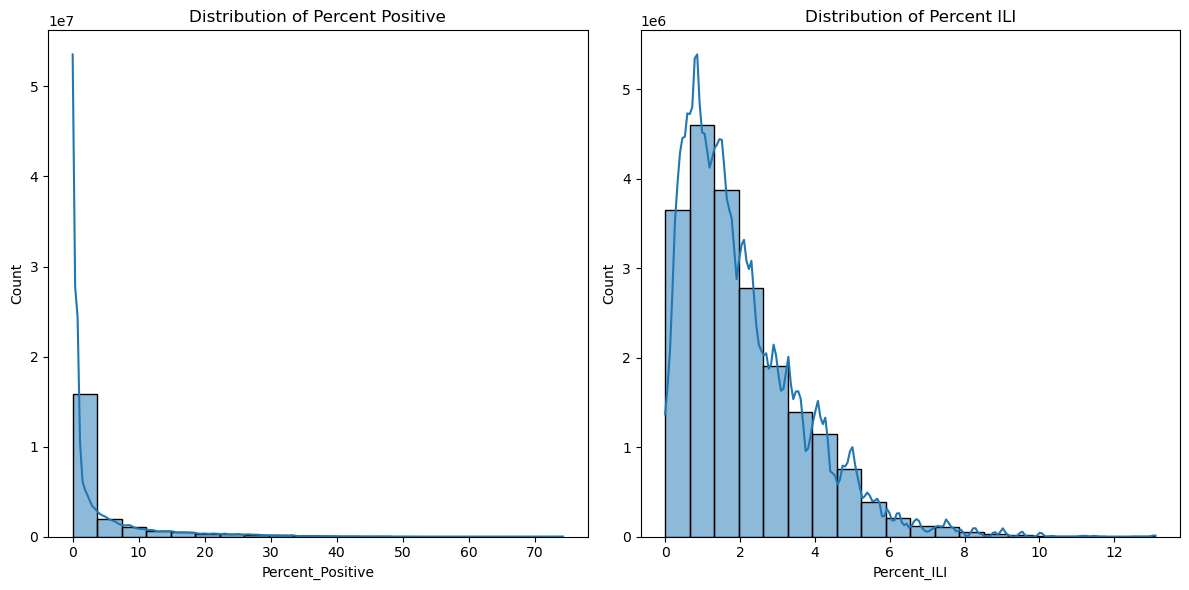

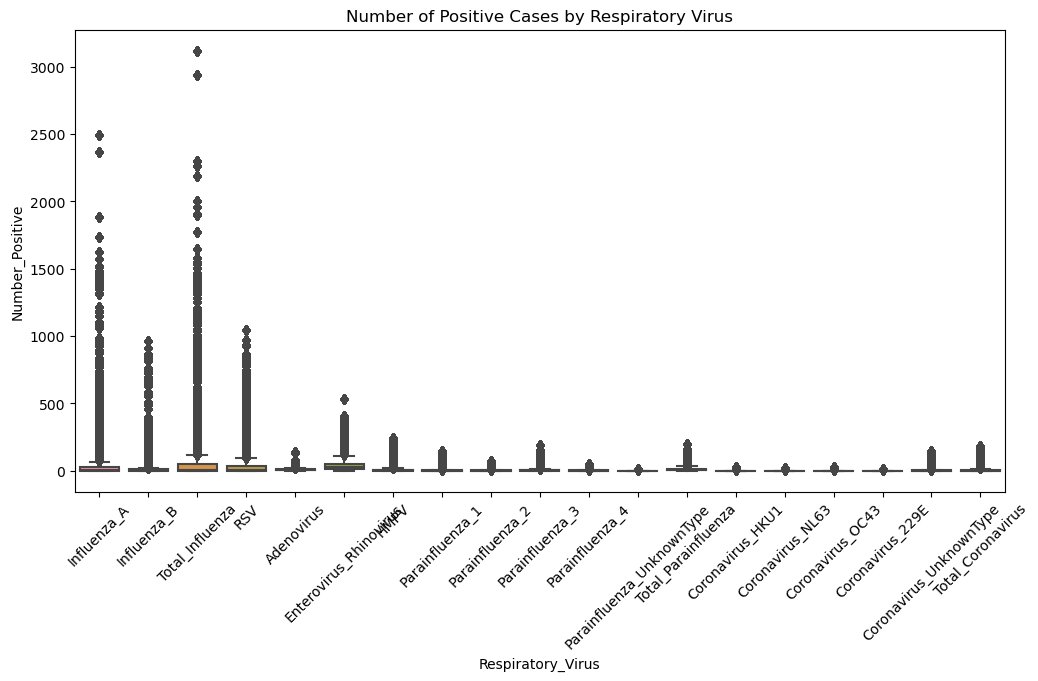

In [22]:

# Histogram of 'Percent_Positive' and 'Percent_ILI'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(comprehensive_df['Percent_Positive'], bins=20, kde=True)
plt.title('Distribution of Percent Positive')

plt.subplot(1, 2, 2)
sns.histplot(comprehensive_df['Percent_ILI'], bins=20, kde=True)
plt.title('Distribution of Percent ILI')

plt.tight_layout()
plt.show()

# Box plot of 'Number_Positive' by 'Respiratory_Virus'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Respiratory_Virus', y='Number_Positive', data=comprehensive_df)
plt.title('Number of Positive Cases by Respiratory Virus')
plt.xticks(rotation=45)
plt.show()


Insights:

graph 1:
Distribution of Percent Positive
The first histogram shows a distribution with a sharp peak at the lower end of the scale (0-10% positive), indicating a high frequency of data points in this range.
The count decreases significantly as the percent positive increases, suggesting that higher percentages are less common in the dataset.
This could imply that whatever is being measured, a positive result over 10% is rare.

graph 2:
Distribution of Percent ILI
The second histogram displays a normal distribution, peaking around 4-6% ILI before tapering off.
This suggests that the data points are more evenly spread out across the range, with the most common values being in the middle of the scale.
The shape of the distribution indicates that the percent ILI is normally varied or follows a typical pattern without extreme outliers.

graph 3:
Influenza A and B stand out with significantly higher counts compared to other viruses, indicating their prevalence among respiratory viral infections.
The graph highlights the impact of these viruses, suggesting that they are a common cause of illness.
The visual representation allows for an easy comparison between the different viruses, showing which ones are more frequently identified in positive cases.

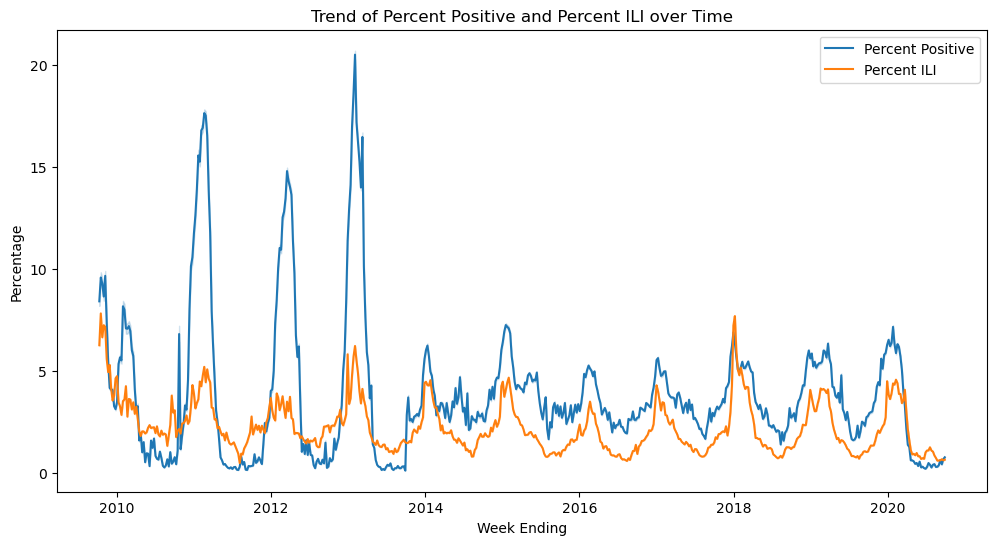

In [23]:
# Time series plot of 'Percent_Positive' and 'Percent_ILI' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='weekending_x', y='Percent_Positive', data=comprehensive_df, label='Percent Positive')
sns.lineplot(x='weekending_x', y='Percent_ILI', data=comprehensive_df, label='Percent ILI')
plt.title('Trend of Percent Positive and Percent ILI over Time')
plt.xlabel('Week Ending')
plt.ylabel('Percentage')
plt.legend()
plt.show()


There are significant spikes in both Percent Positive and Percent ILI at certain points, which could indicate outbreaks or increased incidence of illnesses.

The fluctuations over time suggest that these percentages are not constant and are likely influenced by external factors such as seasonal changes, public health interventions, or the emergence of new pathogens.
The years with notable increases could be correlated with specific health events or epidemics, providing a historical context for the data.

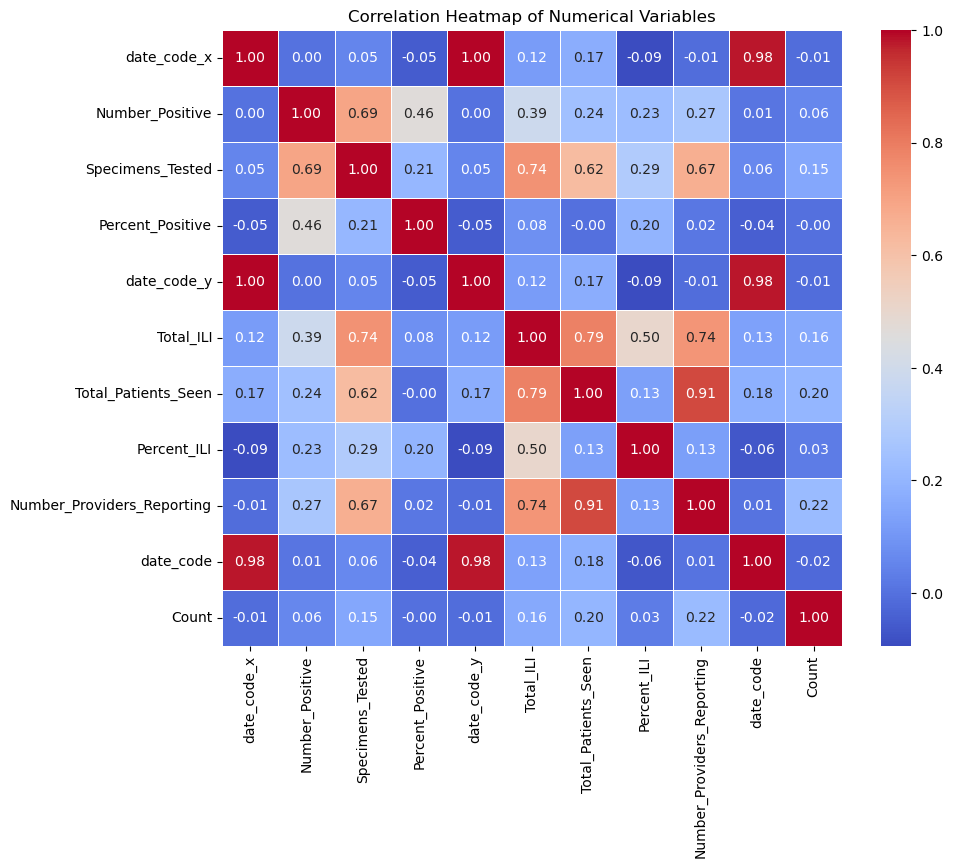

In [24]:
# Select only numerical columns for correlation analysis
numerical_columns = comprehensive_df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


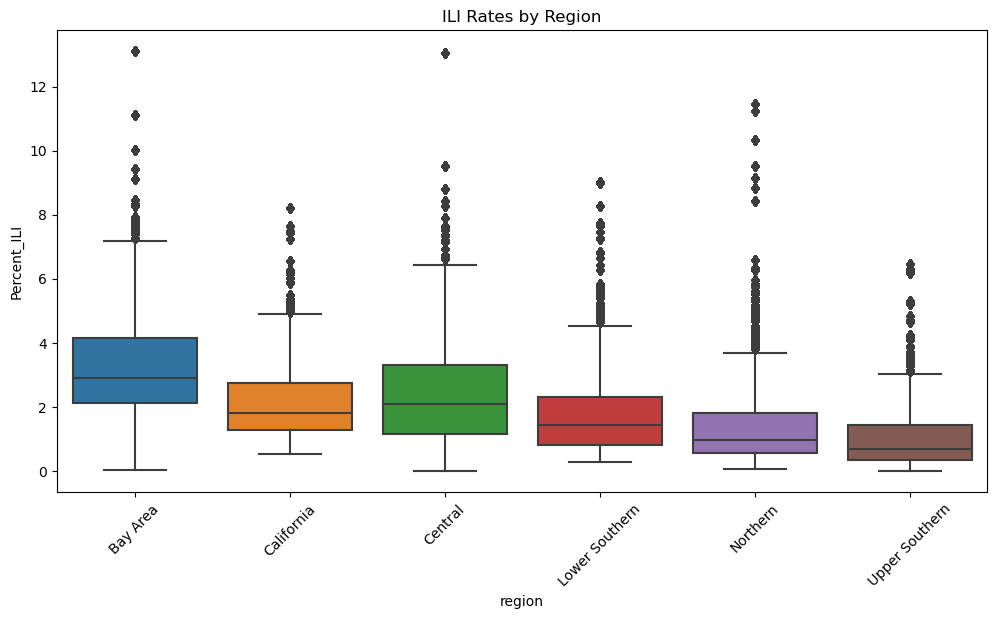

In [25]:
# Plot ILI rates by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='Percent_ILI', data=comprehensive_df)
plt.title('ILI Rates by Region')
plt.xticks(rotation=45)
plt.show()


Distribution: The boxplot shows the spread and distribution of ILI rates within each region. The length of the box indicates the interquartile range, which represents the middle 50% of the data.

Median: The line in the middle of each box represents the median ILI rate for that region, which is the value separating the higher half from the lower half of the data points.

Outliers: Points that appear as individual dots are outliers. These represent regions with ILI rates that are unusually high or low compared to the rest of the data in that region.

Variability: Regions with longer boxes or whiskers show more variability in ILI rates, while shorter boxes or whiskers indicate more consistency.

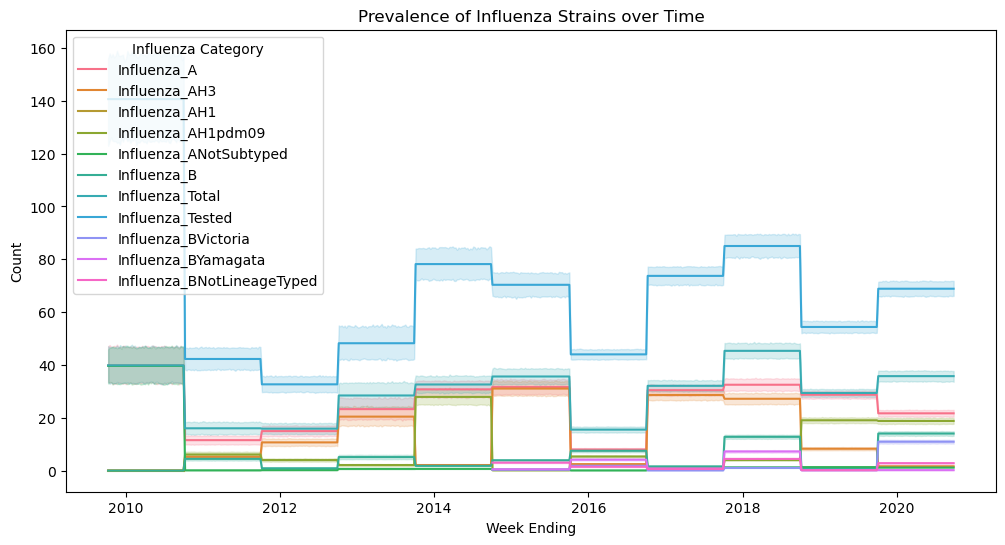

In [26]:
# Plot prevalence of different influenza strains over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='weekending_x', y='Count', hue='Influenza_Category', data=comprehensive_df)
plt.title('Prevalence of Influenza Strains over Time')
plt.xlabel('Week Ending')
plt.ylabel('Count')
plt.legend(title='Influenza Category')
plt.show()


Fluctuating Counts: The graph shows the counts of different flu types and subtypes fluctuating over time, which can indicate the seasonality and yearly variations in flu outbreaks.

Trends: By observing the lines for each flu strain, we can identify trends, such as whether certain strains are becoming more or less common over the years.

Comparisons: The graph allows for a comparison between the different influenza strains, showing which ones have been most prevalent at certain times.

Outbreaks: Significant spikes in the graph could correspond to specific flu outbreaks or seasons with higher than usual activity.

## **Observation**

Findings:
The exploratory data analysis reveals valuable insights into influenza epidemiology in California, including seasonal patterns, correlations between surveillance metrics, and regional variations in ILI rates. These findings provide valuable information for public health decision-making, intervention strategies, and future research in influenza surveillance and control.

Conclusion:
By leveraging data-driven insights, this project contributes to our understanding of influenza epidemiology and supports efforts to enhance surveillance, response strategies, and public health interventions for influenza and other respiratory viruses in California.